In [1]:
%pylab inline
import dataProc_cal as dp
import pandas as pd
import os
import scipy.optimize as op
from scipy.interpolate import interp1d
import scipy.signal as signal
import findEField as fef
import conf

Populating the interactive namespace from numpy and matplotlib


In [88]:
reload(dp)

<module 'dataProc_cal' from 'dataProc_cal.py'>

# Notes
This includes some example plots.

## storm data

In [2]:
#d1 = fef.extractAmplitude_manyFiles([conf.dataDir+("%s"%x) for x in ['A','B','C','D']],1024*1000,10000,10,10,0.8+pi/2)
#d1.to_pickle("/home/brant/d1.pickle")
d1 = pd.read_pickle(conf.dataDir+"d1.pickle")

In [3]:
#d2 = fef.extractAmplitude_manyFiles([conf.dataDir+("%s"%x) for x in ['L','M','N','O']],1024*1000,10000,10,10,0.8+pi/2)
#d2.to_pickle("/home/brant/d2.pickle")
d2 = pd.read_pickle(conf.dataDir+"d2.pickle")

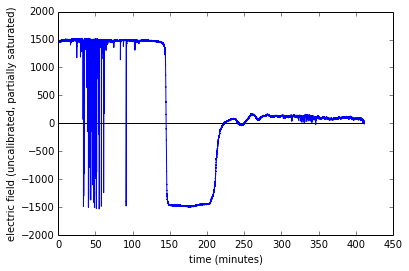

In [5]:
timebase=60
plot(d1['t']/timebase,sqrt(d1['var1'])*sign((d1['v01b']-d1['v01a'] + d1['v02b']-d1['v02a'])/2.0))
# note conversion of variance (always positive) to a standard devitaion (sqrt(var))
# and conversion to a signed quantity by multiplication by the sign of the "exposed-covered" direct amplitude estimate. 
hlines(0,min(d1['t'])/timebase,max(d1['t'])/timebase)
ylabel('electric field (uncalibrated, partially saturated)')
xlabel('time (minutes)')

## saturation
This isn't necessarily a problem.  We might want to consider decreasing the gain of the amp...

In [127]:
x = dp.readArray("/home/brant/delmedata/D")
x[1010:1030]

array([    6,     6,     0,     5,     5,     0,     0,     4,    26,
          10,     5,     0,     9, 32115, 34371,     5,     8,     5,
           0,     9], dtype=uint16)

In [120]:
a = dp.readData("/home/brant/delmedata/D")

(0, 500)

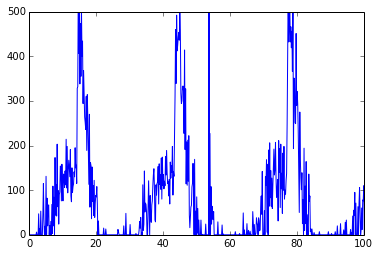

In [124]:
plot(a[0]['t'],a[0]['adc'])
xlim(0,100)
ylim(0,500)

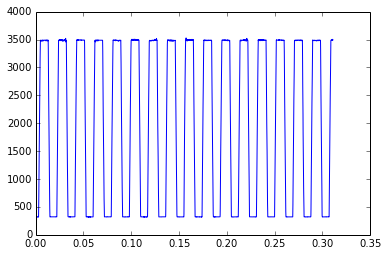

In [8]:
# saturation
a = dp.readData(conf.dataDir+"B",1024*10,1024*1000)
plot(a[0]['t'],a[0]['adc'])

## drift

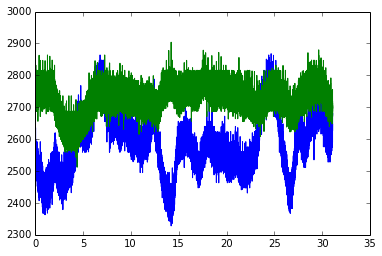

In [13]:
a = dp.readData(conf.dataDir+"C",1024*1000,1024*80000)
plot(a[0]['t'],a[0]['adc'])
plot(a[2]['t'],a[2]['adc'])

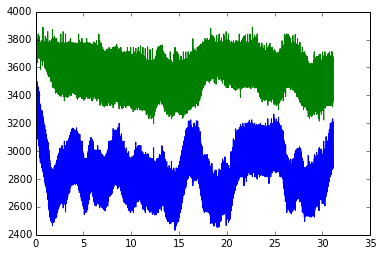

In [12]:
a = dp.readData(conf.dataDir+"D",1024*1000,1024*80000)
plot(a[0]['t'],a[0]['adc'])
plot(a[2]['t'],a[2]['adc'])

## deleteme

In [4]:
#d1 = fef.extractAmplitude_manyFiles(["/a1/millData/20140702-20140703/"+("%s"%x) for x in ['A','B','C','D']],1024*1000,10000,10,10,0.8+pi/2)

In [24]:
x = dp.readData("/a1/millData/20140701-20140702/A",1024*1000,1024*1000)
fs = 1.0/(x[0]['t'][2]-x[0]['t'][1])

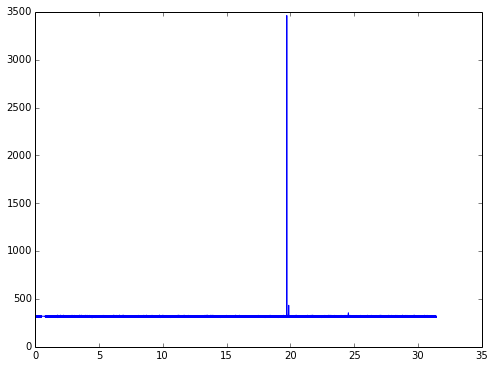

In [25]:
plot(x[0]['t'],x[0]['adc'])

In [85]:
def rescale(x,a,b):
    return (x-min(x))*1.0/(max(x)-min(x))*(b-a)+a

<matplotlib.colorbar.Colorbar instance at 0x188e1fc8>

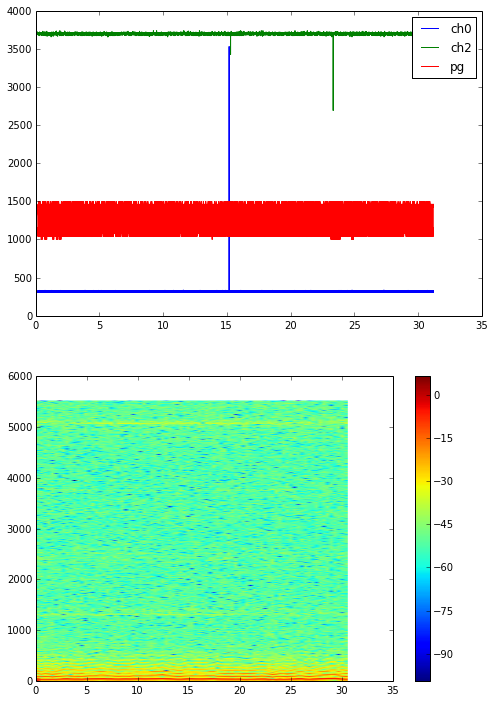

In [132]:
x = dp.readData("/a1/millData/20140701-20140702/A",1024*1000,1024*0)
fs = 1.0/(x[0]['t'][2]-x[0]['t'][1])

figsize(8,12)
ax=subplot(211)
plot(x[0]['t'],x[0]['adc'],label="ch0")
plot(x[2]['t'],x[2]['adc'],label="ch2")
plot(x[1]['t'],rescale(x[1]['adc'],1000,1500),label="pg")
legend()

subplot(212,sharex=ax)
specgram(x[1]['adc'],Fs=fs,NFFT=1024*4,detrend=detrend_linear);
colorbar()

In [7]:
y = dp.procBigFile("/a1/millData/20140701-20140702/A",0,2,func=dp.fitSegs_qnd)

NameError: global name 'var' is not defined

processing 0 of 100000, 0.000000


In [6]:
reload(dp)

<module 'dataProc_cal' from 'dataProc_cal.py'>

In [2]:
a = dp.readData("/a1/millData/20130830-20130831/C")

In [8]:
plot(a[0]['t'],a[0]['adc'])
#ylim(0,4000)
#xlim(0,0.1)

/usr/lib/python2.7/site-packages/IPython/core/formatters.py:239: FormatterWarning: Exception in image/png formatter: Allocated too many blocks
  FormatterWarning,
